# Test tiling transformation

### Add the src folder to the path

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

root_path = os.path.dirname(os.getcwd())
src_path = os.path.join(root_path, "src")
sys.path.insert(0, src_path)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Common import and set random seed

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import torchvision
import torch
import pytorch_lightning as pl
import tissue_purifier as tp

matplotlib.rcParams["figure.dpi"] = 200
torch.manual_seed(0)
np.random.seed(0)

### Read in all the csv file

In [6]:
#data_folder = "/home/jupyter/data/slide-seq/original_data/"
data_folder = "../slide-seq-data"

df_wt1 = pd.read_csv(os.path.join(data_folder, "wt_1.csv"))
df_wt2 = pd.read_csv(os.path.join(data_folder, "wt_2.csv"))
df_wt3 = pd.read_csv(os.path.join(data_folder, "wt_3.csv"))
df_dis1 = pd.read_csv(os.path.join(data_folder, "sick_1.csv"))
df_dis2 = pd.read_csv(os.path.join(data_folder, "sick_2.csv"))
df_dis3 = pd.read_csv(os.path.join(data_folder, "sick_3.csv"))

## Make and visualize one sparse_image

In [8]:
sparse_image = tp.data_utils.SparseImage.from_panda(
    df_wt1,
    x="x",
    y="y",
    category="cell_type",
    pixel_size=4,
    padding=10
)

dense_image = tp.data_utils.transforms.RandomGaussianBlur((1, 1))(sparse_image.to_dense().float())

number of elements ---> 31659
The dense shape of the image is -> torch.Size([9, 1168, 1168])


In [9]:
dense_image.shape

torch.Size([9, 1168, 1168])

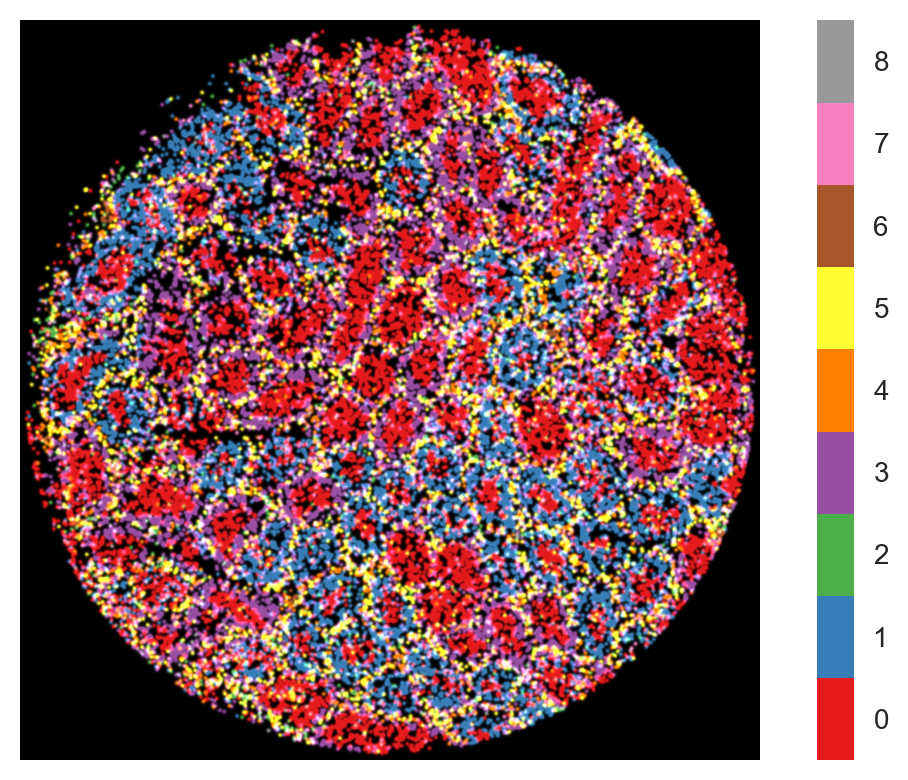

In [14]:
tp.plot_utils.show_raw_all_channels(dense_image, cmap="Set1", intensity_scale_factor=3)

## Tiling the sparse image

In [72]:
from tissue_purifier.data_utils.sparse_transform import TilingSparseTensor

tiling = TilingSparseTensor(crop_size=224, stride=200, n_element_min=300, random_order=False)
list_crops = tiling(sparse_image)
print(len(list_crops), list_crops[0].size())

30 torch.Size([9, 224, 224])


In [73]:
dense_batch = tp.data_utils.sparse_transform.SparseToDense(dim=-4)(list_crops)
print(dense_batch.shape)

torch.Size([30, 9, 224, 224])


In [74]:
dense_batch_rasterized = tp.data_utils.transforms.RandomGaussianBlur((1, 1))(dense_batch)

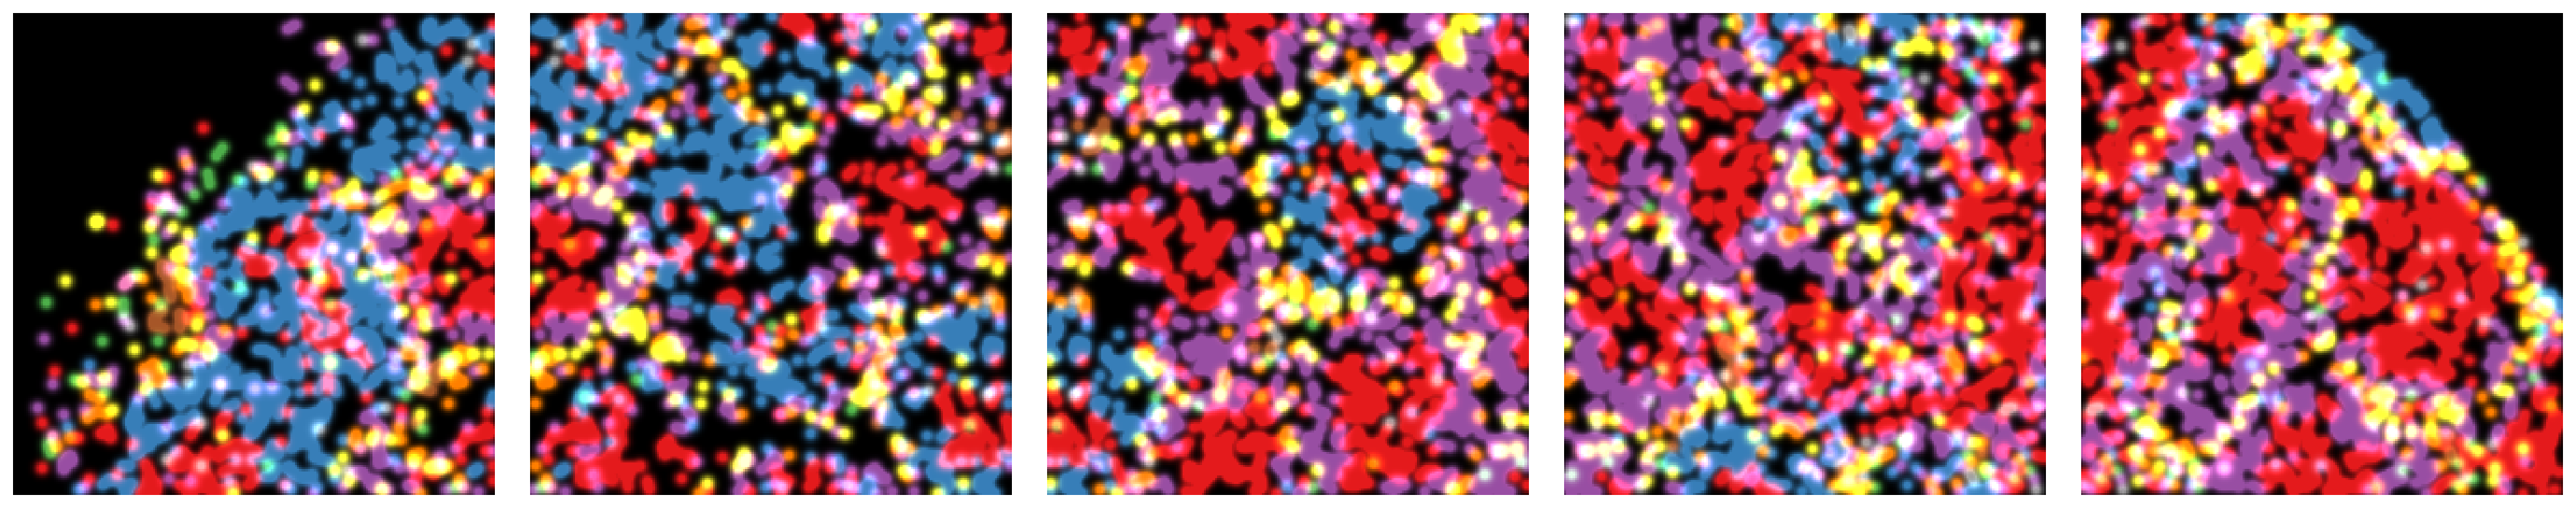

In [79]:
tp.plot_utils.show_raw_all_channels(dense_batch_rasterized[3:(3+5)], 
                                    cmap="Set1", 
                                    intensity_scale_factor=3, n_col=5)

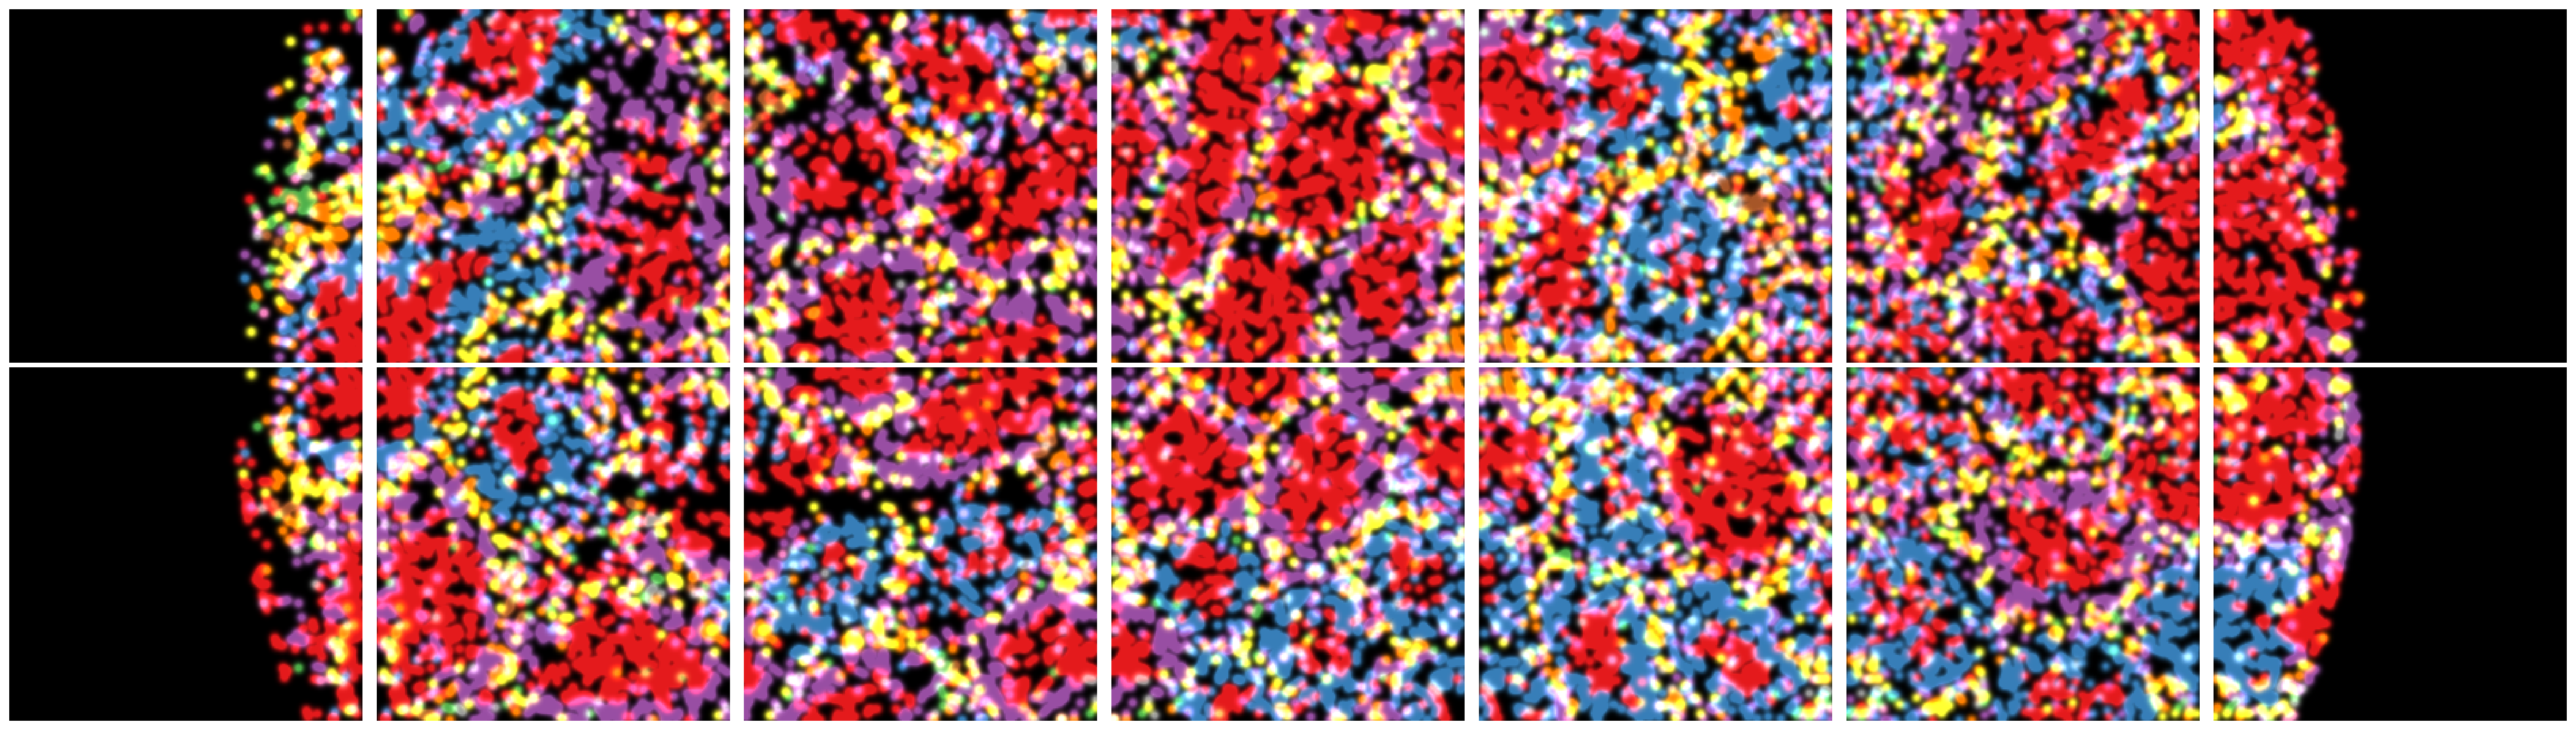

In [81]:
tp.plot_utils.show_raw_all_channels(dense_batch_rasterized[(3+5):(3+5+14)], 
                                    cmap="Set1", 
                                    intensity_scale_factor=3, n_col=7)

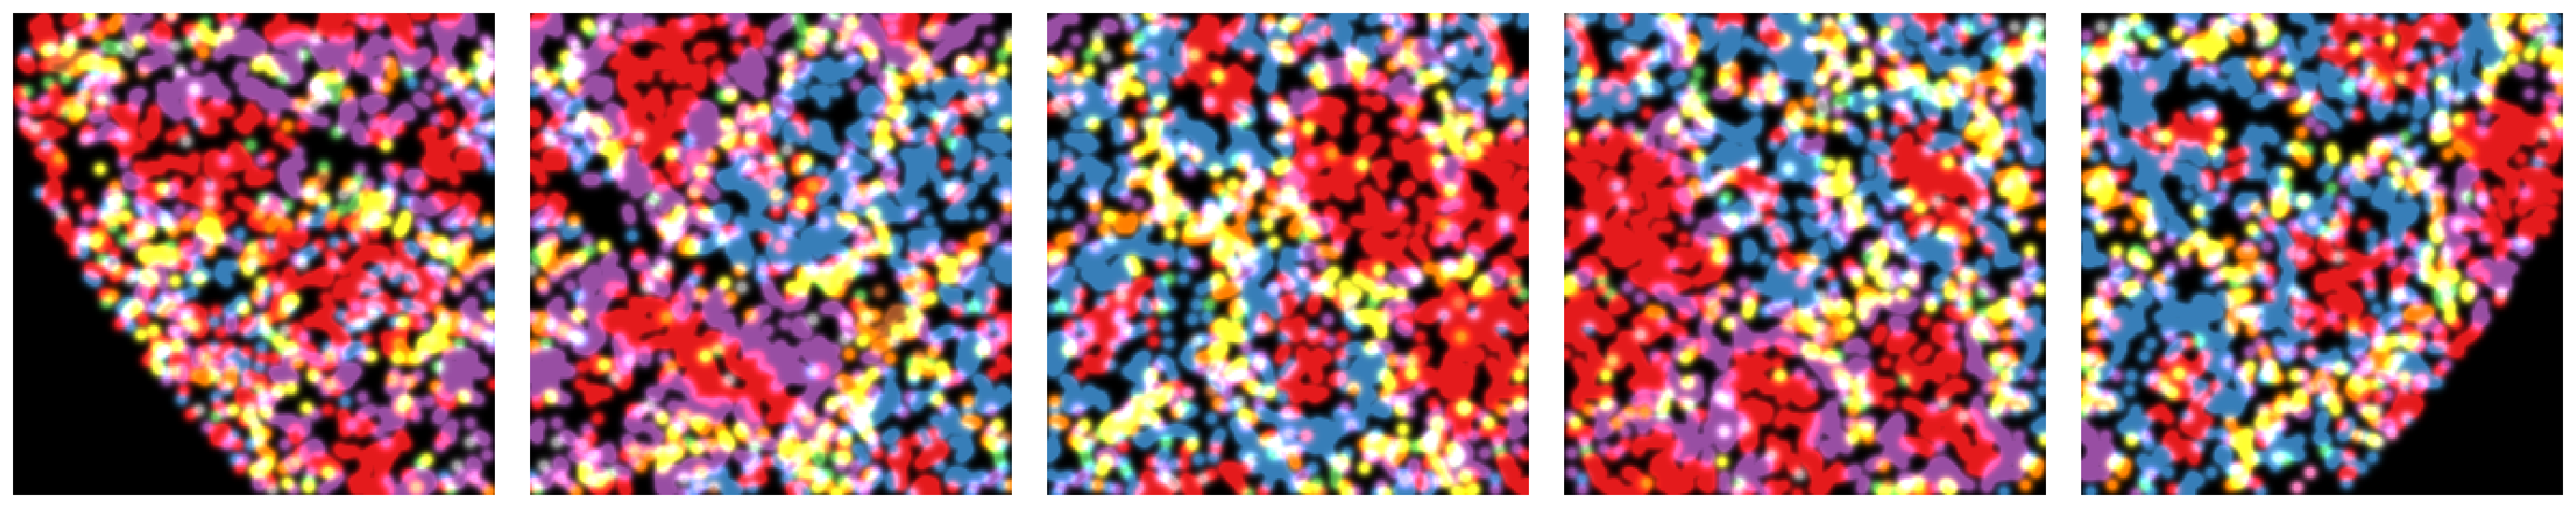

In [85]:
tp.plot_utils.show_raw_all_channels(dense_batch_rasterized[(3+5+14):-3], 
                                    cmap="Set1", 
                                    intensity_scale_factor=3, n_col=5)